In [1]:
import FPCAnalysis
import numpy as np

In [4]:
#load the input parameters
path = '/home/crbrown/Simulations/Tristan/htg_perp_bigrun/'
num = '700'

#Read the inputs
inputpath = path+'/input'
path = path+'/output/'
inputs = FPCAnalysis.dtr.load_input(inputpath)

#read the parameters of the simulation
params = FPCAnalysis.dtr.load_params(path,num)

#load the fields data
dfields = FPCAnalysis.dtr.load_fields(path,num,normalizeFields=True)

lowerresolution = True #lower field resolution for speed!
if(lowerresolution):
    print('dfields["ex"].shape before:',dfields['ex'].shape)
    dfields = FPCAnalysis.ao.avg_dict(dfields,binidxsz=[1,8,8]) #note, each element in binidxsz must be an integer divisor of the shape of its respective axis
    print('dfields["ex"].shape after:',dfields['ex'].shape)

#load particles, with velocities normalzied to upstream thermal species velocity
dpar_elec, dpar_ion = FPCAnalysis.dtr.load_particles(path,num,normalizeVelocity=True)



dfields["ex"].shape before: (2, 2400, 10600)
dfields["ex"].shape after: (2, 300, 1325)


In [7]:
#pick region to compute FPC for
x1 = 8
x2 = 8.1
y1 = 0
y2 = 5
z1 = -1 #if bounds are outside of the simulation, that is okay!
z2 = 1

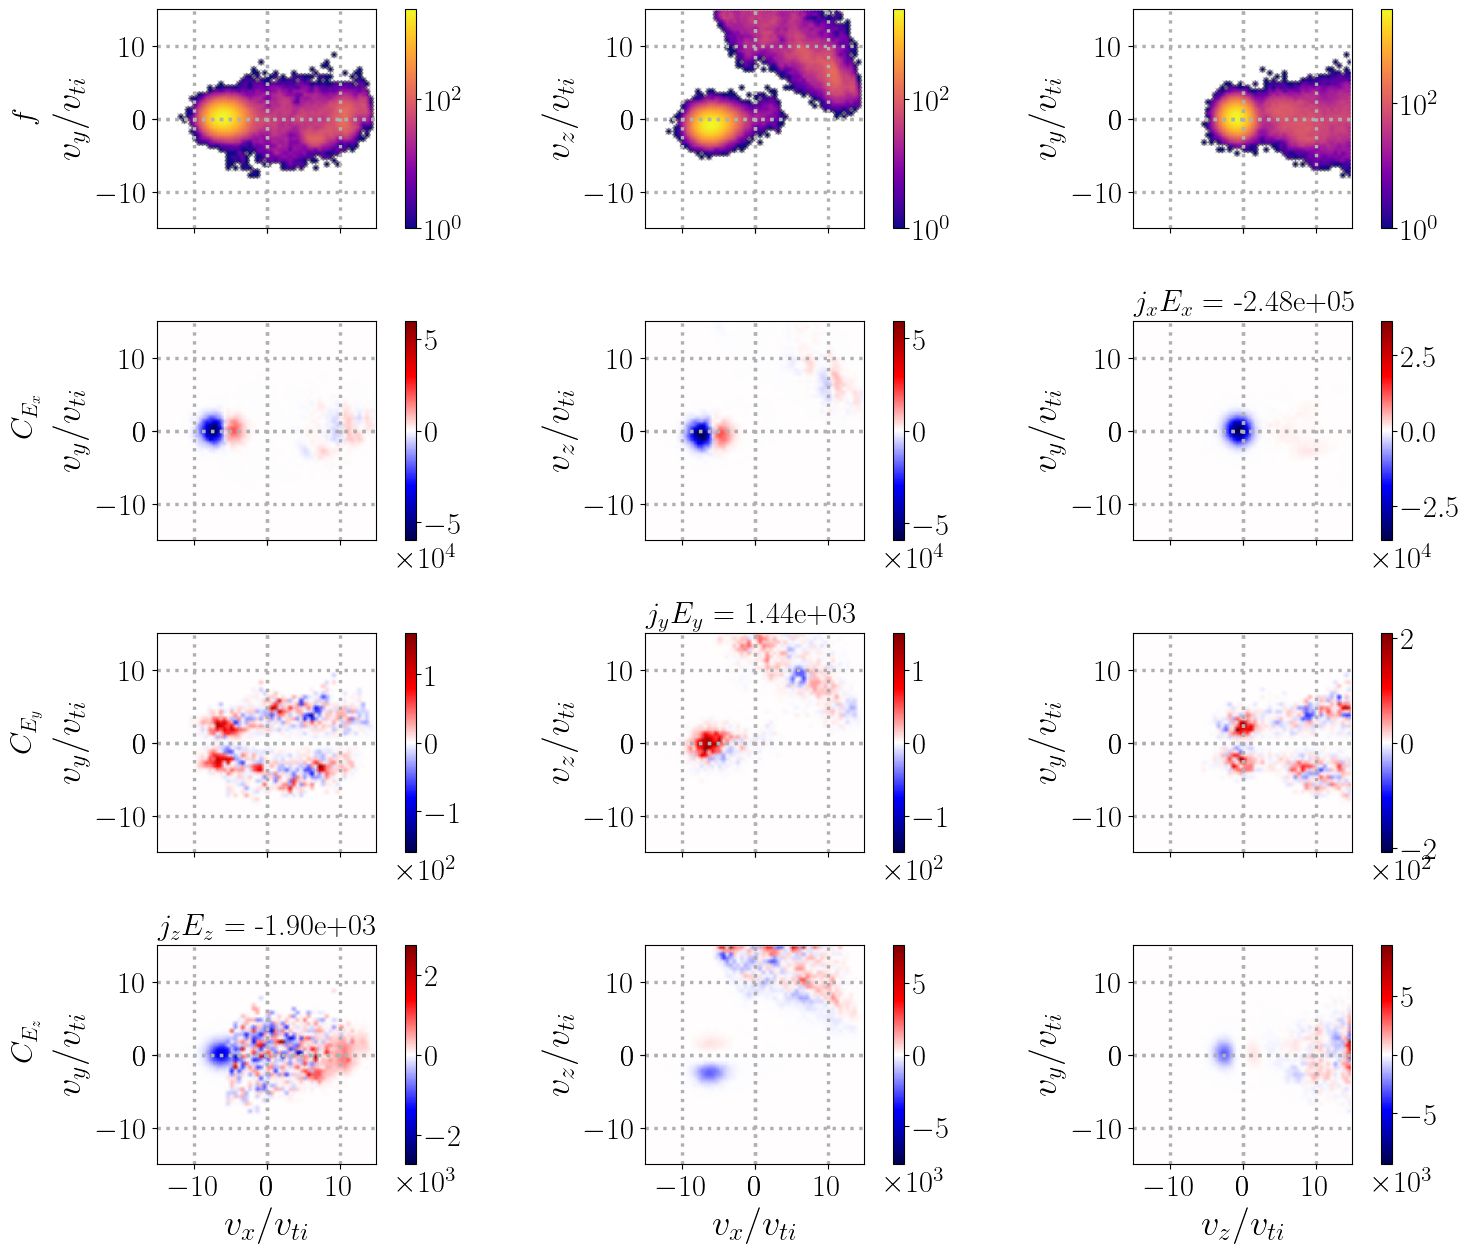

In [8]:
# compute the fpc (CEx) and hist for ions in simulation frame
vmax = 15
dv = .5

#let's compute all 3 and make a 9 panel superplot
vx, vy, vz, totalPtcl, hist, corex = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_ion, dfields, 'ex')
vx, vy, vz, totalPtcl, hist, corey = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_ion, dfields, 'ey')
vx, vy, vz, totalPtcl, hist, corez = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_ion, dfields, 'ez')


#plot the data
flnm = '' #set this to something to save as png
FPCAnalysis.pltvv.project_and_plot_supergrid(vx,vy,vz,vmax,hist,corex,corey,corez,flnm)


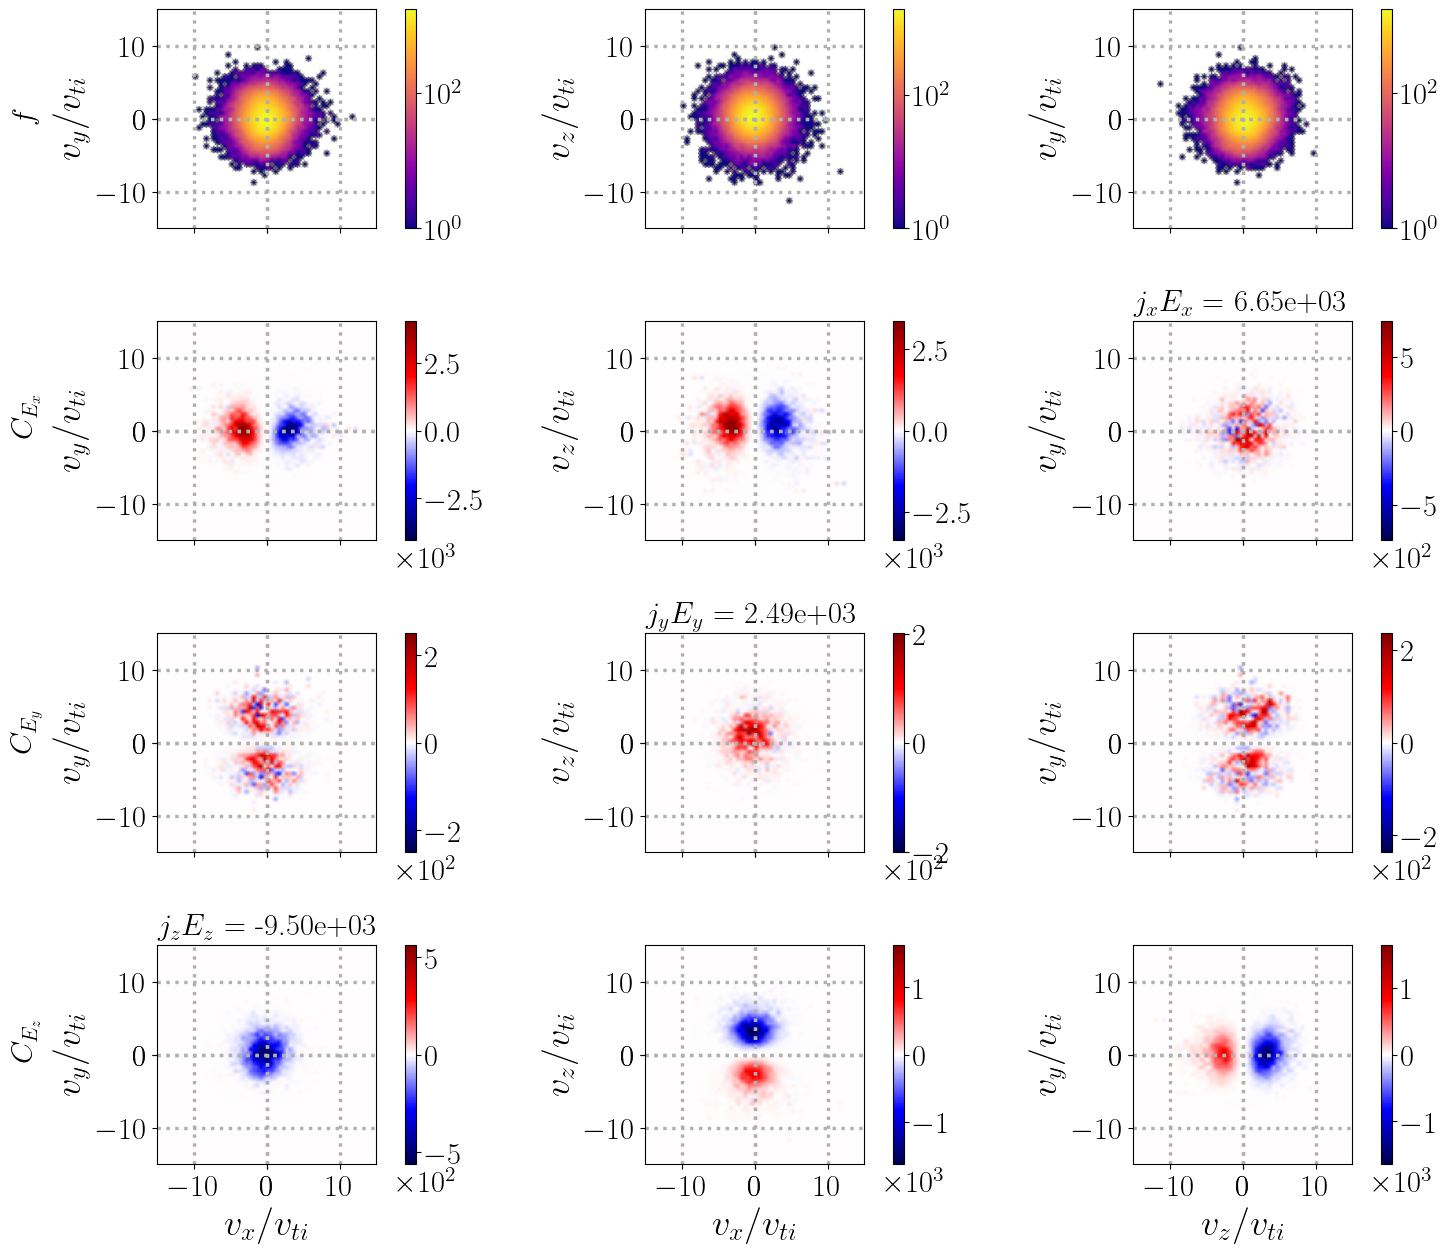

In [11]:
# compute the fpc (CEx) and hist for electrons in simulation frame
vmax = 15
dv = .5

#let's compute all 3 and make a 9 panel superplot
vx, vy, vz, totalPtcl, hist, corex = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_elec, dfields, 'ex')
vx, vy, vz, totalPtcl, hist, corey = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_elec, dfields, 'ey')
vx, vy, vz, totalPtcl, hist, corez = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dpar_elec, dfields, 'ez')


#plot the data
flnm = '' #set this to something to save as png
FPCAnalysis.pltvv.project_and_plot_supergrid(vx,vy,vz,vmax,hist,corex,corey,corez,flnm)
